In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import skfuzzy as fuzz
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from skfuzzy.cluster import cmeans

In [4]:
def normalizae():
    df = pd.read_csv('data/zoo.data', header=None)

    # Convertendo o dataframe e um NumpyArray
    df = df.drop(columns=[0])
    data = df.values

    # Normalizando o array
    scaler = MinMaxScaler()
    X = scaler.fit_transform(data)
    # X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Transformando 9 variáveis númericas em 3
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    
    # Retornando o DataFrame que sera usado no kmeans e os labels corretos (para comparar depois)
    return pd.DataFrame(X_pca), pd.DataFrame(X)


In [5]:
pca, original = normalizae()

In [6]:
pca.head()

,0,1,2
0,-1.238935,0.036645,0.587096
1,-1.395346,-0.263081,0.036687
2,0.774761,1.459998,-0.297096
3,-1.238935,0.036645,0.587096
4,-1.374645,0.111358,0.041247


In [7]:
original.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,0.0


In [8]:
def calculate_fuzzy_cmeans_elbow(data, k_min, k_max):
    # Normalização dos dados
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Inicializando o modelo Fuzzy cMeans
    # k é o número de clusters, que variará de k_min a k_max
    k_range = range(k_min, k_max + 1)
    fpc_scores = []

    for k in k_range:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_scaled.T, k, 2, error=0.005, maxiter=1000)
        fpc_scores.append(fpc)

    # Plot do gráfico de Elbow
    plt.figure(figsize=(10, 5))
    plt.plot(k_range, fpc_scores, marker='o', linestyle='-', color='b')
    plt.title('Método Elbow (Fuzzy cMeans)')
    plt.xlabel('Número de clusters')
    plt.ylabel('Fuzzy Partition Coefficient (FPC)')
    plt.grid(True)
    plt.show()   

Agora mostrando o número ideal de Cluster ( Aparentemente é 5 ou 6 )

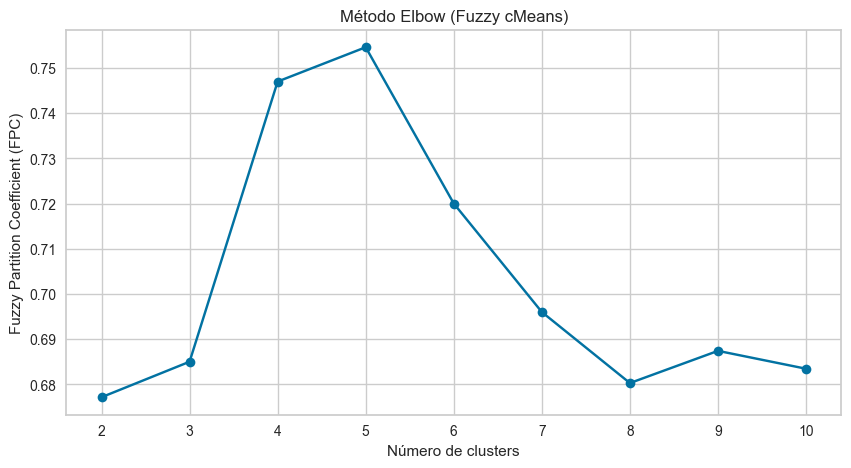

In [9]:
calculate_fuzzy_cmeans_elbow(normalizae()[0], 2, 10) 

In [16]:
def silhouette_fuzzy_cmeans(dataset, k, m=2, error=0.005, maxiter=1000):
    info = dataset.values
    fig, ax = plt.subplots((len(k) + 1) // 2, 2, figsize=(15, 8))
    
    for i in k:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(info.T, i, m, error=error, maxiter=maxiter)
        cluster_membership = np.argmax(u, axis=0)
        h, j = divmod(i, 2)
        
        if (len(k) + 1) // 2 != 1:
            vis = SilhouetteVisualizer(KMedoids(n_clusters=i), colors='yellowbrick', ax=ax[h - 1][j])
        else:
            vis = SilhouetteVisualizer(KMedoids(n_clusters=i), colors='yellowbrick')
        
        vis.fit(info, cluster_membership)
        
        silhouette_avg = silhouette_score(info, cluster_membership)
        vis.ax.set_title(f'Silhouette for k={i}\nScore: {silhouette_avg:.5f}')

    plt.tight_layout()
    plt.show()

D:\Users\igbt\AppData\Roaming\Python\Python311\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
D:\Users\igbt\AppData\Roaming\Python\Python311\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
D:\Users\igbt\AppData\Roaming\Python\Python311\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
D:\Users\igbt\AppData\Roaming\Python\Python311\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(


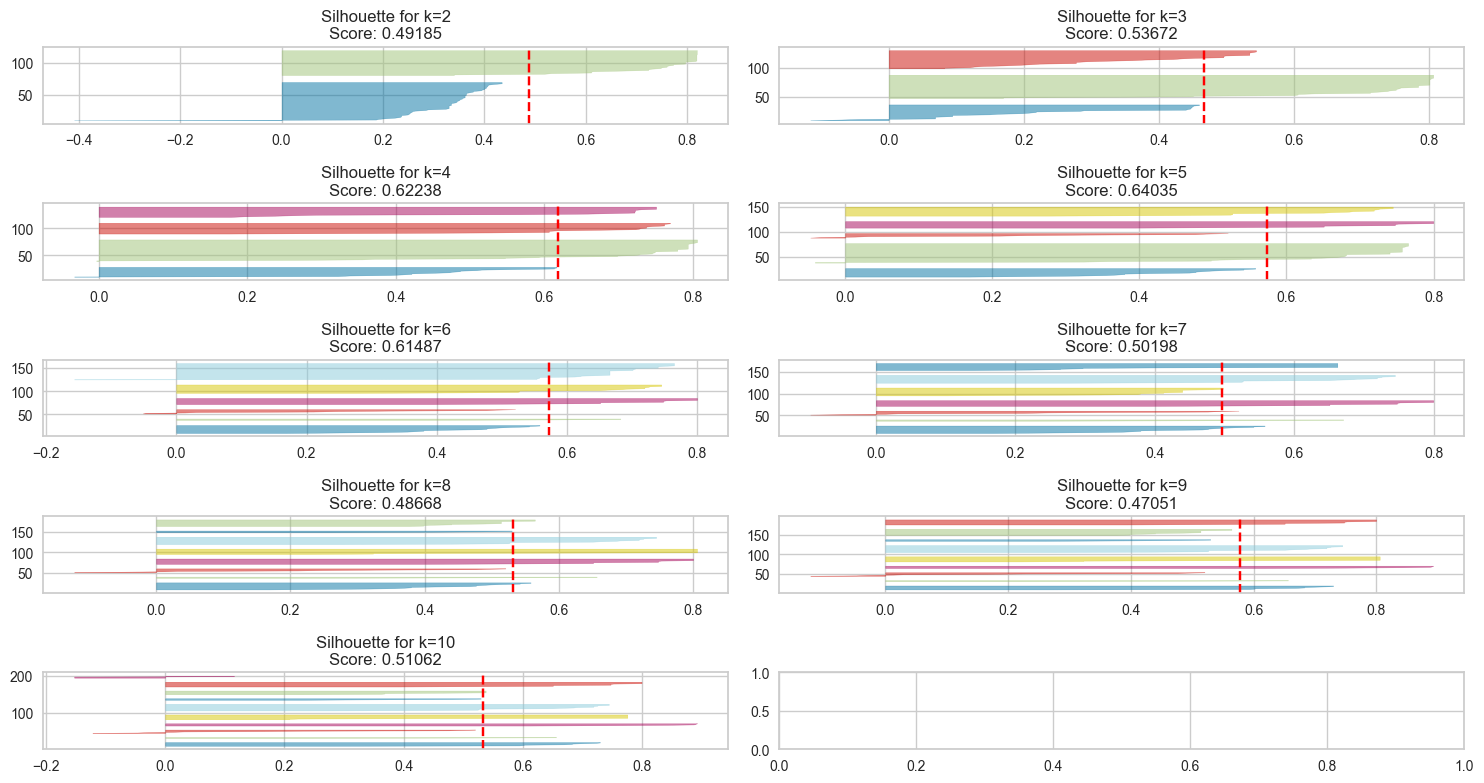

In [17]:
silhouette_fuzzy_cmeans(normalizae()[0], [2, 3, 4, 5, 6, 7, 8, 9, 10])

In [12]:
def graph(dataset, labels, name):
  fig = plt.figure(figsize=(10,10))
  plt.get_cmap('tab10')
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(dataset[0], dataset[1], dataset[2],c=labels, cmap="viridis")
  ax.xaxis.set_ticklabels([])
  ax.yaxis.set_ticklabels([])
  ax.zaxis.set_ticklabels([])
  ax.set_xlabel("V1")
  ax.set_ylabel("V2")
  ax.set_zlabel("V3")
  ax.set_title(name)

array([[0.03976363, 0.00627016, 0.94632764, 0.03976363, 0.01041791,
        0.00627016, 0.01424743, 0.90696302, 0.94632764, 0.06170045,
        0.01041791, 0.02802737, 0.94632764, 0.02596502, 0.01204982,
        0.01279007, 0.00251326, 0.00627016, 0.92334905, 0.39253281,
        0.02802737, 0.01971155, 0.00627016, 0.0201934 , 0.00593279,
        0.29439416, 0.23669188, 0.06070365, 0.00627016, 0.02828652,
        0.01476182, 0.01424743, 0.03045959, 0.08077574, 0.94364512,
        0.02235067, 0.01744255, 0.00251326, 0.94632764, 0.02279772,
        0.0161719 , 0.055113  , 0.01798979, 0.01959126, 0.01041791,
        0.01041791, 0.01279007, 0.01041791, 0.09636885, 0.01278242,
        0.01041791, 0.0161719 , 0.63069471, 0.01300621, 0.01278242,
        0.00627016, 0.03711591, 0.02802737, 0.27400706, 0.01959126,
        0.92334905, 0.94632764, 0.36302257, 0.19935703, 0.01041791,
        0.01424743, 0.39253281, 0.01041791, 0.00644658, 0.01041791,
        0.01424743, 0.09993076, 0.07454987, 0.94

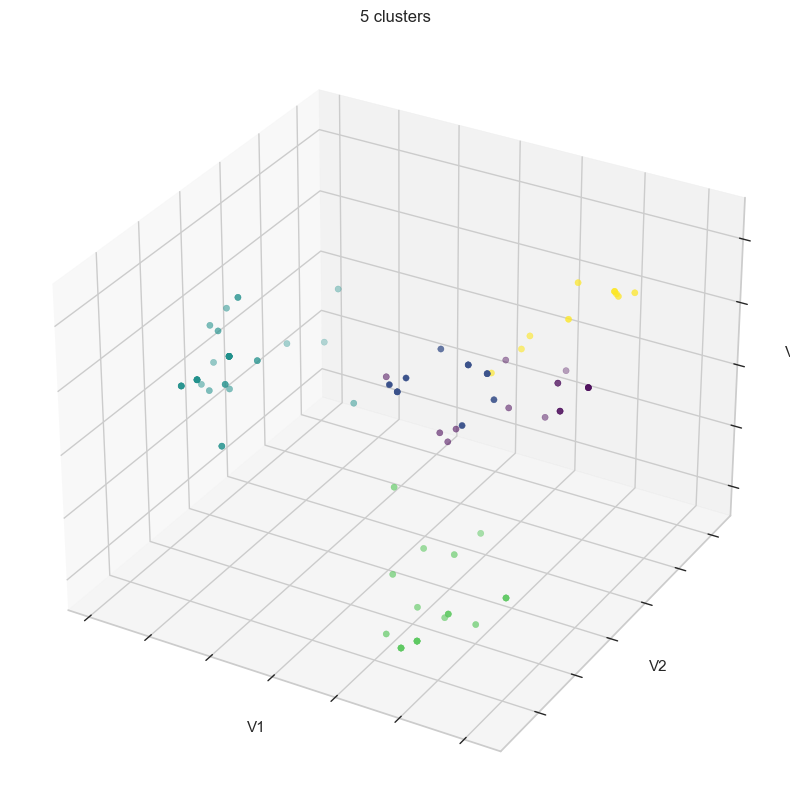

In [13]:

def fuzzy_cmeans(dataset, k, m=2, error=0.005, maxiter=1000):
    info = dataset.values
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(info.T, k, m, error=error, maxiter=maxiter)
    cluster_membership = np.argmax(u, axis=0)
    graph(dataset, cluster_membership, "5 clusters")
    return u

fuzzy_cmeans(normalizae()[0], 5)

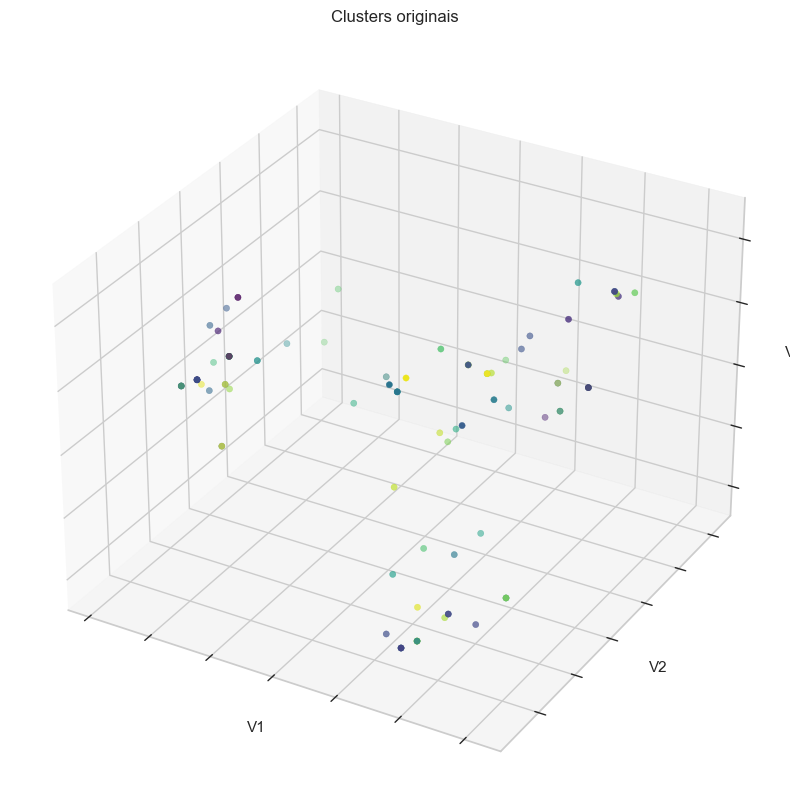

In [15]:
from sklearn.calibration import LabelEncoder


df = pd.read_csv('data/zoo.data', header=None)
target = df[0]

# Convertendo os nomes dos animais em números
le = LabelEncoder()
target_encoded = le.fit_transform(target)

graph(pca, target_encoded, "Clusters originais")

plt.show()